<a href="https://colab.research.google.com/github/lilasu086/Coding-Project/blob/main/BA780_Assignment3_Yu_Chun_Su.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Framingham Dataset**


##Dataset Introduction

In this dataset, each row represents one person, and each column contains people's attributes. There are 4240 rows and 16 columns.

For the variable types, one is categorical, the other is binary, and the other is numerical.
- categorical : ``education``
- binary : ``male``, ``currentSmoker``, ``BPMeds``, ``prevalaentSmoker``, ``prevalaentHyp``, ``diabetes``, ``TenYearCHD``
- numerical : ``age``, ``cigsPerDay``, ``totChol``, ``sysBP``, ``diaBP``, ``BMI``, ``heartRate``, ``glucose``

## Data Cleaning and Transformation

### 1. Import the Data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('/content/Framingham.csv')

### 2. Overview of the Data

In [ ]:
dataset.head(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


Since the ``head()`` function only shows a portion of the attributes, I use the ``info()`` function to see what attributes are included and their missing value.

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


Before making manual selections, I take a look at how many entries in each attribute are null values.

In [ ]:
dataset.isnull().mean() * 100

male               0.000000
age                0.000000
education          2.476415
currentSmoker      0.000000
cigsPerDay         0.683962
BPMeds             1.250000
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.179245
sysBP              0.000000
diaBP              0.000000
BMI                0.448113
heartRate          0.023585
glucose            9.150943
TenYearCHD         0.000000
dtype: float64

I observe that all columns are showing less than 10% of emptiness. Since such columns may provide some information, keeping and filling such columns is the best strategy.

### 3. Data Preprocessing

Now let's deal with the null values in the dataframe.

In [ ]:
# Check one more time on the null values
dataset.isnull().mean() * 100

male               0.000000
age                0.000000
education          2.476415
currentSmoker      0.000000
cigsPerDay         0.683962
BPMeds             1.250000
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.179245
sysBP              0.000000
diaBP              0.000000
BMI                0.448113
heartRate          0.023585
glucose            9.150943
TenYearCHD         0.000000
dtype: float64

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


From the printout, I can see that all attributes with null values are numeric variables except education and BPMeds.

i. Since education's null value percentage is below 5 percent for the categorical variables, let's fill the null with the most frequently appeared values.

In [ ]:
Education_mode = dataset['education'].mode()[0] # Get the most frequent category
dataset['education'].fillna(Education_mode, inplace=True)

Because the categorical variable should be an integer, I transform the education type to int64.

In [ ]:
dataset['education'] = dataset['education'].astype('int64')

In [ ]:
dataset.dtypes

male                 int64
age                  int64
education            int64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

ii. For the binary variable, I can build an ML model to predict it.

In [ ]:
prob_distribution = dataset['BPMeds'].value_counts(normalize=True)

dataset['BPMeds'].fillna(np.random.choice(prob_distribution.index, p=prob_distribution.values),inplace=True)


iii. For the other numeric variables, I can fill the null with the mean.

In [ ]:
cigsPerDay_mean = dataset['cigsPerDay'].mean()
dataset['cigsPerDay'].fillna(cigsPerDay_mean, inplace=True)
totChol_mean = dataset['totChol'].mean()
dataset['totChol'].fillna(totChol_mean, inplace=True)
BMI_mean = dataset['BMI'].mean()
dataset['BMI'].fillna(BMI_mean, inplace=True)
heartRate_mean = dataset['heartRate'].mean()
dataset['heartRate'].fillna(heartRate_mean, inplace=True)
glucose_mean = dataset['glucose'].mean()
dataset['glucose'].fillna(glucose_mean, inplace=True)

Now, I can check again whether there are null values in the dataframe.

In [ ]:
dataset.isnull().mean() * 100

male               0.0
age                0.0
education          0.0
currentSmoker      0.0
cigsPerDay         0.0
BPMeds             0.0
prevalentStroke    0.0
prevalentHyp       0.0
diabetes           0.0
totChol            0.0
sysBP              0.0
diaBP              0.0
BMI                0.0
heartRate          0.0
glucose            0.0
TenYearCHD         0.0
dtype: float64

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4240 non-null   int64  
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4240 non-null   float64
 5   BPMeds           4240 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4240 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4240 non-null   float64
 13  heartRate        4240 non-null   float64
 14  glucose          4240 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(8), int64(8)
memory usage: 530.1 KB


### 4. Dataset Summaries

Use ``describe()`` to compute several common aggregates for each column and returns the result.

In [ ]:
dataset.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,0.429245,49.580189,1.955189,0.494104,9.005937,0.029245,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.018522,0.500024,11.881610,0.168513,0.076569,0.462799,0.158280,44.327521,22.033300,11.910394,4.070687,12.023929,22.831748,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.077500,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,80.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,90.000000,28.032500,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


This research tries to predict if the client has a 10-year risk of coronary heart disease. Therefore, it has a binary classification problem with a slightly unbalanced target.

In [ ]:
dataset[dataset['TenYearCHD'] == 1].shape[0] / dataset.shape[0]

0.15188679245283018

In [ ]:
dataset[dataset['TenYearCHD'] == 0].shape[0] / dataset.shape[0]

0.8481132075471698

Alternatively, I could use ``groupby()``.

In [ ]:
dataset.groupby('TenYearCHD').size()/dataset.shape[0]

TenYearCHD
0    0.848113
1    0.151887
dtype: float64

#### i. Data Aggregation

I can use ``groupby()`` to see more insights about target variable ``TenYearCHD``.



In [ ]:
dataset.groupby('TenYearCHD').mean()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
TenYearCHD,,,,,,,,,,,,,,,
0,0.410734,48.762514,1.978031,0.489989,8.716118,0.023081,0.003893,0.275862,0.019188,235.165095,130.337319,82.166435,25.671982,75.762514,80.799976
1,0.532609,54.145963,1.827640,0.517081,10.624242,0.063665,0.017081,0.504658,0.062112,245.267540,143.618789,86.981366,26.520106,76.529315,88.461464


From the above table, I see that people who have a 10-year risk of CHD all have higher mean values except for the ``education`` variable. Thus, I want to see more details about this result out of expectation.

In [ ]:
dataset.groupby('TenYearCHD')['education'].agg([pd.Series.mode, np.median, np.mean, np.std])

,mode,median,mean,std
TenYearCHD,,,,
0,1,2.0,1.978031,1.014123
1,1,1.0,1.827640,1.034301


Based on the group ``TenYearCHD``, I can observe that the ``education`` variable is "skewed to the right" and has more minor variation.

Additionally, from my knowledge, totChol and sysBP are two variables strongly connected with my target variable TenYearCHD, so I groupyby them to see more insights.

In [ ]:
dataset.groupby('TenYearCHD').agg(min_totChol=('totChol','min'), max_totChol=('totChol','max'), mean_totChol=('totChol','mean'), std_totChol=('totChol','std'))

,min_totChol,max_totChol,mean_totChol,std_totChol
TenYearCHD,,,,
0,113.0,696.0,235.165095,43.515778
1,107.0,600.0,245.267540,47.748971


In [ ]:
dataset.groupby('TenYearCHD').agg(min_sysBP=('sysBP','min'), max_sysBP=('sysBP','max'), mean_sysBP=('sysBP','mean'), std_sysBP=('sysBP','std'))

,min_sysBP,max_sysBP,mean_sysBP,std_sysBP
TenYearCHD,,,,
0,83.5,243.0,130.337319,20.450363
1,83.5,295.0,143.618789,26.690282


From these groupby tables, I can see that
* People with a 10-year risk of CHD have higher mean values and significant variation in total cholesterol and systolic blood pressure.
* But these people have lower minimum and maximum total cholesterol.

#### ii. Data PIvot Tables

I also can get more insights about ``totChol`` and ``sysBP`` these two variables using pivot tables.

In [ ]:
dataset.pivot_table(values='totChol', index='male', columns='TenYearCHD', aggfunc='mean')

TenYearCHD,0,1
male,,
0,237.666910,251.541185
1,231.575828,239.762096


In [ ]:
dataset.pivot_table(values='totChol', index=['male','prevalentHyp'], columns='TenYearCHD', aggfunc='mean')

TenYearCHD                  0           1
male prevalentHyp                        
0    0             231.782730  245.141339
     1             253.354663  256.607730
1    0             229.266038  237.820965
     1             237.506521  242.061780

In [ ]:
dataset.pivot_table(values='sysBP', index='male', columns='TenYearCHD', aggfunc='mean')

TenYearCHD,0,1
male,,
0,131.090137,146.767442
1,129.257278,140.855685


In [ ]:
dataset.pivot_table(values='sysBP', index=['male','prevalentHyp'], columns='TenYearCHD', aggfunc='mean')

TenYearCHD                  0           1
male prevalentHyp                        
0    0             121.322518  123.804511
     1             157.131488  164.946429
1    0             122.072437  126.733871
     1             147.705314  157.585987

From these pivot tables, I can see that
* All people with a ten-year CHD risk have higher total cholesterol and systolic blood pressure.
* Females have higher total cholesterol and systolic blood pressure than Males, except the ones who don't have prevalent hypertension.

##Data Visualization

To facilitate readability for the charts, a color palette has been set for use across all charts.

In [ ]:
palette1 = sns.set_theme(palette=sns.color_palette("blend:#7AB,#EDA"))

### 1. Correlation Matrix

**Objectives**
- First, to know the correlation between all variables, I use a heatmap to have an overview of every two variables' relationship roughly.

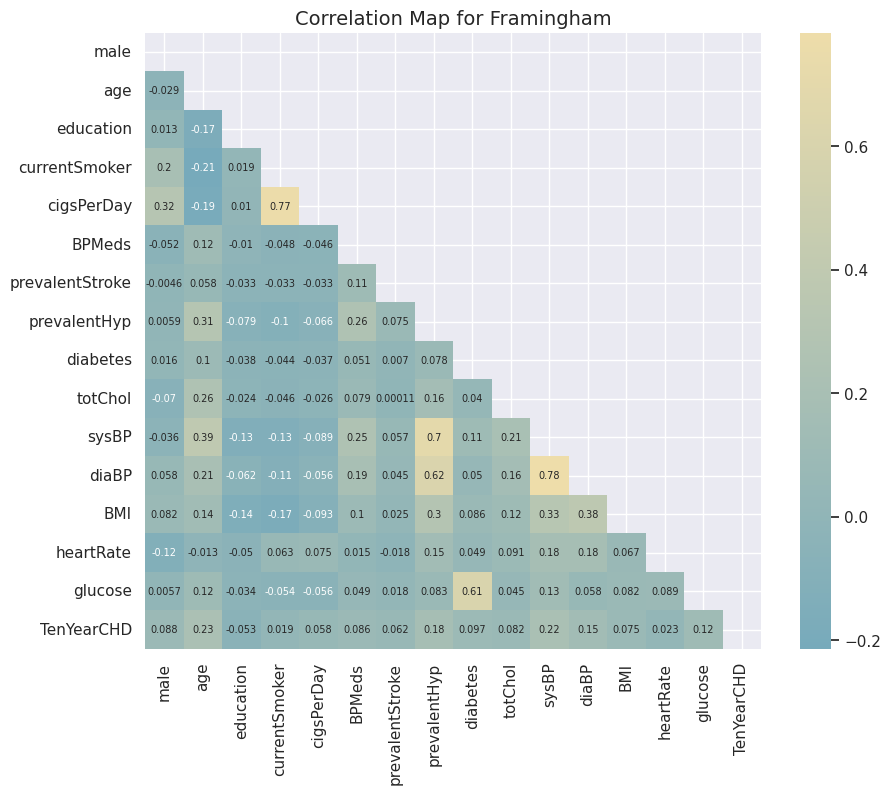

In [ ]:
plt.figure(figsize=(10, 8))
corr_matrix=dataset.corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
cmap = sns.color_palette("blend:#7AB,#EDA", as_cmap=True)
sns.heatmap(corr_matrix, mask=mask, square=True, cmap=cmap, annot=True, annot_kws={"size": 7})
plt.title('Correlation Map for Framingham', size=14);

**Observations**
- Surprisingly, almost none of the variables correlate highly with ``TebYearCHD``.
- Alternatively, ``age`` has a high relationship with ``sysBP``. While other variables have high correlations, it's intuitive that variables like ``sysBP`` and ``diaBP`` would be highly correlated due to their definitions. Therefore, I aim to investigate the relationship between ``age`` and ``sysBP``.

### 2. KDE of Age

**Objectives**
- Before exploring the relationship between ``age`` and ``sysBP``, I want to ensure the data is normally distributed. The KDE chart will give me a good idea of how age is distributed among the dataset.

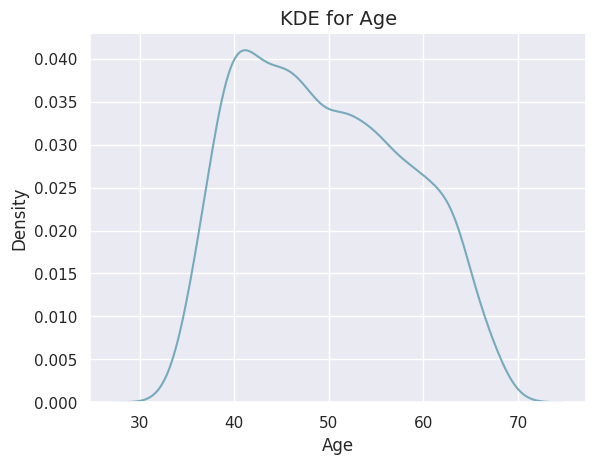

In [ ]:
data = dataset['age']
sns.kdeplot(data, color= sns.color_palette("blend:#7AB,#EDA")[0])
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('KDE for Age', size=14)
plt.show();

**Observations**
- There is a little left skew in age, but it is almost normally distributed.
- By reviewing the dataset, two people above 70 ages in the dataset, and their gender is female. My goal is to show the difference in gender behavior, so I think removing these two outliers is a better choice.

In [ ]:
dataset = dataset.drop(dataset[dataset['age'] == 70].index)

### 3. Age Group vs Systolic Blood Pressure with Gender

**Objectives**
- To understand the relationship between Age and prevalence of hypertension more, a bar plot is used, with the Gender variable as the third variable.

Because I want to display age intervals rather than each age value, I have to manipulate the age column to create one new column called ``age_group`` first.

In [ ]:
dataset['age_group'] = dataset['age'] // 10 * 10

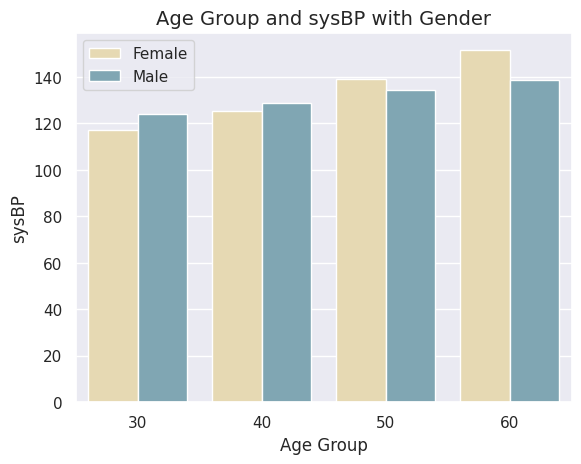

In [ ]:
contrast_colors = sns.color_palette("blend:#7AB,#EDA")
contrast_colors = [contrast_colors[-1], contrast_colors[0]]
ax = sns.barplot(x=dataset['age_group'], y=dataset['sysBP'], hue=dataset['male'], errorbar=('ci', False), order=[30,40,50,60], palette=contrast_colors)
legend = ax.legend()
legend.texts[0].set_text('Female')
legend.texts[1].set_text('Male')
plt.xlabel('Age Group')
plt.title('Age Group and sysBP with Gender', size=14);


**Observations**
- Males have a higher prevalent hypertension than females when they are under 50, but the situation reverses entirely after age 50.

### 4. Systolic Blood Pressure vs Diastolic blood pressure with Gender

**Objectives**
- After knowing sysBP and age correlate, given the strong correlation between systolic and diastolic blood pressure, I am interested in determining whether males or females tend to have higher levels of both blood pressure types.

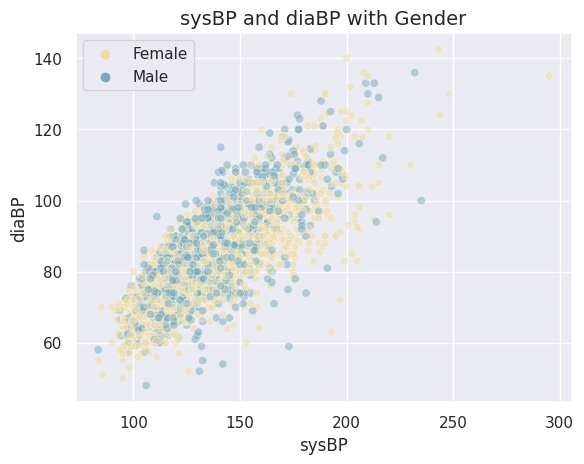

In [ ]:
ax = sns.scatterplot(x=dataset['sysBP'], y=dataset['diaBP'], hue=dataset['male'], palette=contrast_colors, alpha=0.5)
legend = ax.legend()
legend.texts[0].set_text('Female')
legend.texts[1].set_text('Male')
plt.title('sysBP and diaBP with Gender', size=14);

**Observations**
- For diastolic blood pressure, males typically exhibit higher values than females. Conversely, females tend to have relatively higher systolic blood pressure than males.

### 5. Age Group vs Systolic Blood Pressure with Ten Year risk of CHD

**Objectives**
- Finally, go back to the original research purpose. I want to know if different age groups affect systolic blood pressure based on the ten-year risk of coronary heart disease being present or not.

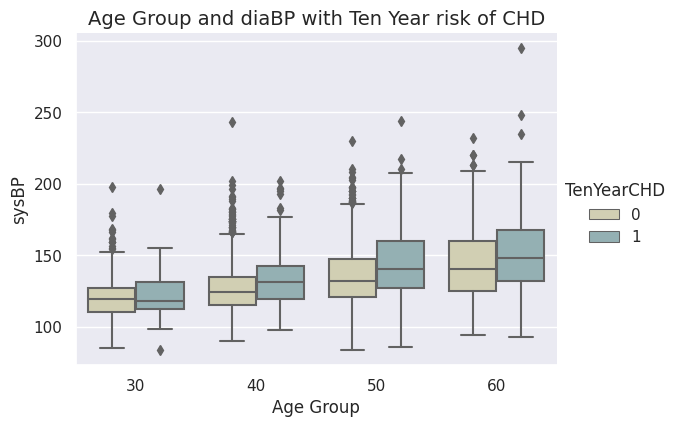

In [ ]:
contrast_colors = sns.color_palette("blend:#7AB,#EDA")
contrast_colors = [contrast_colors[-2], contrast_colors[1]]
ax = sns.catplot(x="age_group", y="sysBP", hue="TenYearCHD", kind="box", data=dataset, palette=contrast_colors,  height=4.2, aspect=1.4)
plt.xlabel('Age Group')
plt.title('Age Group and diaBP with Ten Year risk of CHD', size=14);

**Observations**
- Systolic blood pressure shows an increase in its minimum, maximum, and median values as age increases
- People with a ten-year risk of coronary heart disease in any age group tend to exhibit higher minimum, maximum, and median systolic blood pressure, except for those in the 30 age group.

##Conclusion

Although the original aim of the research was to analyze variables impacting the ten-year risk of coronary heart disease, it became evident that no variables had a significant impact. Conversely, through careful observation, my objective shifted to gaining insights into the relationship between age and systolic blood pressure. As age increases, sysBP also tends to increase.

Delving deeper into my exploration, I discovered that gender also plays a crucial role in this relationship, with age 50 being a turning point for this variable. Additionally, females tend to have higher diastolic blood pressure. Finally, I observed that individuals under 40 years of age with a ten-year risk of CHD seem to have lower sysBP.

Through this exploration, I have gained a deeper understanding of heart disease's causes, relationships, and outcomes. In the future, I will strive to maintain good health by being mindful of specific conditions.